# Taller 4 - Ciencia de datos Aplicada





Miembros del proyecto:

*   Alejandro Garcia Flores
*   Brayann Quevedo
*   Fabian Castellanos

# Planteamiento del problema

El área de fidelización de una empresa de telecomunicaciones tiene como uno de sus
objetivos disminuir la tasa de churn (abandono) por parte de sus clientes. Por esta razón,
desea construir un modelo de machine learning que permita predecir si un cliente es
propenso abandonar los servicios que actualmente tiene contratados con la empresa. Una
vez construido, este modelo debe ser disponibilizado a través de una API REST que pueda
ser consumida por la plataforma que es usada por los asesores de call center usando dicha
predicción para ofrecer nuevos productos o servicios para los clientes más propensos al
abandono.
A continuación, se describe todo el conjunto de datos recolectado:

# 0. Importación de Librerías.

In [1]:
!pip install matplotlib~=3.5.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     \ 22.0 MB 259 kB/s
     |████████████████████████████████| 102 kB 4.4 MB/s 
     |████████████████████████████████| 679 kB 6.5 MB/s 
     |████████████████████████████████| 62 kB 619 kB/s 
     |████████████████████████████████| 9.9 MB 45.3 MB/s 
     |████████████████████████████████| 4.7 MB 19.5 MB/s 
     |████████████████████████████████| 296 kB 55.4 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-dev-py2.py3-none-any.whl size=324949 sha256=b4072fd412ce91f2c424ada192520c9e5292a8974a59b1915ca54f6e96223266
  Stored in directory: /tmp/pip-ephem-wheel-cache-3frvrxa9/wheels/64/b6/85/dfc808b23666a5910371784e349d28818006ff63ed9cfeca59
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=23beabdebe41e3e84b58855c022a4ccb7f8aafacf5ea18c8c0181f440b02a785
  Stored in directory: /root/.cache/pip/wheels/23/14/6e/4be5bfeeb027f4939a01764b4

In [87]:
#Manejo de datos
import pandas as pd
import numpy as np
from datetime import datetime

#Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Analisis profundo de datos
from pandas_profiling import ProfileReport

#Entrenamiento del modelo
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import joblib

#Librerías extras
import itertools
import pylev

# 1. Entendimiento del Negocio

|     Field               |     Description                                                                                                                 |
|-------------------------|---------------------------------------------------------------------------------------------------------------------------------|
|     customerID          |     Customer ID                                                                                                                 |
|     gender              |     Whether the customer is a male or a female                                                                                  |
|     SeniorCitizen       |     Whether the customer is a senior citizen or not (1, 0)                                                                      |
|     Partner             |     Whether the customer has a partner or not (Yes, No)                                                                         |
|     Dependents          |     Whether the customer has dependents or not (Yes, No)                                                                        |
|     tenure              |     Number of months the customer has stayed with the company                                                                   |
|     PhoneService        |     Whether the customer has a phone service or not (Yes, No)                                                                   |
|     MultipleLines       |     Whether the customer has multiple lines or not (Yes, No, No   phone service)                                                |
|     InternetService     |     Customer’s internet service provider (DSL, Fiber optic, No)                                                                 |
|     OnlineSecurity      |     Whether the customer has online security or not (Yes, No,   No internet service)                                            |
|     OnlineBackup        |     Whether the customer has online backup or not (Yes, No, No   internet service)                                              |
|     DeviceProtection    |     Whether the customer has device protection or not (Yes, No,   No internet service)                                          |
|     TechSupport         |     Whether the customer has tech support or not (Yes, No, No   internet service)                                               |
|     StreamingTV         |     Whether the customer has streaming TV or not (Yes, No, No   internet service)                                               |
|     StreamingMovies     |     Whether the customer has streaming movies or not (Yes, No,   No internet service)                                           |
|     Contract            |     The contract term of the   customer (Month-to-month, One year, Two year)                                                    |
|     PaperlessBilling    |     Whether the customer has paperless billing or not (Yes, No)                                                                 |
|     PaymentMethod       |     The customer’s payment method (Electronic check, Mailed   check,     Bank transfer (automatic), Credit card (automatic))    |
|     MonthlyCharges      |     The amount charged to the customer monthly                                                                                  |
|     TotalCharges        |     The total amount charged to the customer                                                                                    |
|     Churn               |     Whether the customer churned or not (Yes or No)                                                                             |

In [4]:
url = 'https://raw.githubusercontent.com/a-garcia13/taller-4-CDA/main/data/DataSet_Entrenamiento_v1.json'

data = pd.read_json(url)
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,5386-THSLQ,Female,1,Yes,No,66,No,No phone service,DSL,No,...,Yes,No,Yes,No,One year,No,Bank transfer (automatic),45.55,3027.25,No
4,3192-NQECA,Male,0,Yes,No,68,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),110.00,7611.85,Yes


In [5]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# 2. Analisis Exploratorio

De la primera inspeccion de los datos se pueden tomar las siguientes decisiones:
1. Eliminar la columna "Costumer ID" (Esto se hara en el pipeline)
2. Es necesario examinar a profundidad los datos de la columna "Total Charges"

## 2.1 Variables Categoricas

|     Field               |     Description                                                                                                                 |
|-------------------------|---------------------------------------------------------------------------------------------------------------------------------|
|     gender              |     Whether the customer is a male or a female                                                                                  |
|     SeniorCitizen       |     Whether the customer is a senior citizen or not (1, 0)                                                                      |
|     Partner             |     Whether the customer has a partner or not (Yes, No)                                                                         |
|     Dependents          |     Whether the customer has dependents or not (Yes, No)                                                                        |
|     PhoneService        |     Whether the customer has a phone service or not (Yes, No)                                                                   |
|     MultipleLines       |     Whether the customer has multiple lines or not (Yes, No, No   phone service)                                                |
|     InternetService     |     Customer’s internet service provider (DSL, Fiber optic, No)                                                                 |
|     OnlineSecurity      |     Whether the customer has online security or not (Yes, No,   No internet service)                                            |
|     OnlineBackup        |     Whether the customer has online backup or not (Yes, No, No   internet service)                                              |
|     DeviceProtection    |     Whether the customer has device protection or not (Yes, No,   No internet service)                                          |
|     TechSupport         |     Whether the customer has tech support or not (Yes, No, No   internet service)                                               |
|     StreamingTV         |     Whether the customer has streaming TV or not (Yes, No, No   internet service)                                               |
|     StreamingMovies     |     Whether the customer has streaming movies or not (Yes, No,   No internet service)                                           |
|     Contract            |     The contract term of the   customer (Month-to-month, One year, Two year)                                                    |
|     PaperlessBilling    |     Whether the customer has paperless billing or not (Yes, No)                                                                 |
|     PaymentMethod       |     The customer’s payment method (Electronic check, Mailed   check,     Bank transfer (automatic), Credit card (automatic))    |
|     Churn               |     Whether the customer churned or not (Yes or No)                                                                             |

[Text(0, 0, '3049'), Text(0, 0, '2951')]

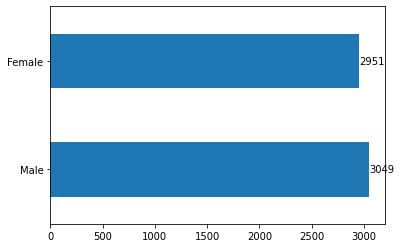

In [7]:
ax = data['gender'].value_counts().plot.barh()
ax.bar_label(ax.containers[0])

<AxesSubplot:title={'center':'SeniorCitizen'}, ylabel='SeniorCitizen'>

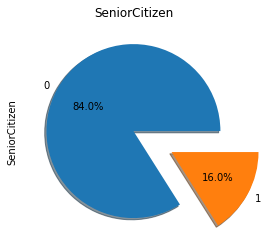

In [8]:
data['SeniorCitizen'].value_counts().plot.pie(y='', title="SeniorCitizen", legend=False, \
                   autopct='%1.1f%%', explode=(0, 0.5), shadow=True, startangle=0)

[Text(0, 0, '3097'), Text(0, 0, '2903')]

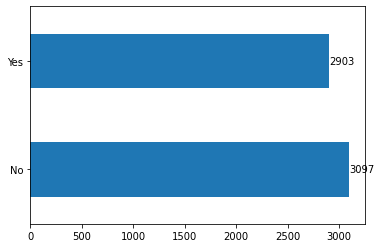

In [9]:
ax = data['Partner'].value_counts().plot.barh()
ax.bar_label(ax.containers[0])

<AxesSubplot:title={'center':'Dependents'}, ylabel='Dependents'>

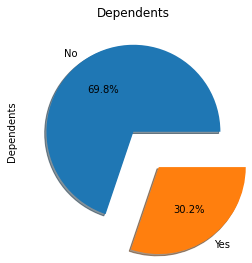

In [10]:
data['Dependents'].value_counts().plot.pie(y='', title="Dependents", legend=False, \
                   autopct='%1.1f%%', explode=(0, 0.5), shadow=True, startangle=0)

[Text(0, 0, '5410'), Text(0, 0, '590')]

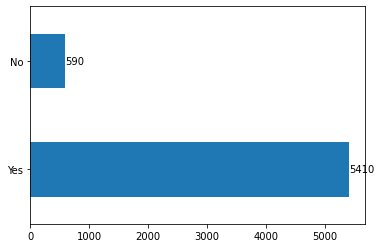

In [11]:
ax = data['PhoneService'].value_counts().plot.barh()
ax.bar_label(ax.containers[0])

<AxesSubplot:title={'center':'MultipleLines'}, ylabel='MultipleLines'>

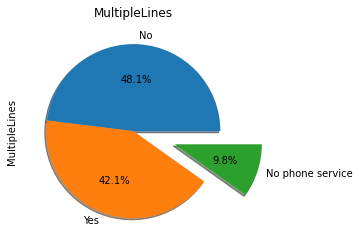

In [12]:
data['MultipleLines'].value_counts().plot.pie(y='', title="MultipleLines", legend=False, \
                   autopct='%1.1f%%', explode=(0, 0, 0.5), shadow=True, startangle=0)

<AxesSubplot:title={'center':'InternetService'}, ylabel='InternetService'>

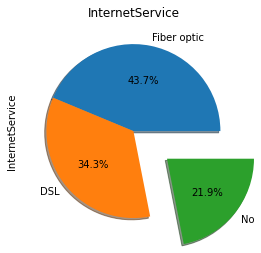

In [13]:
data['InternetService'].value_counts().plot.pie(y='', title="InternetService", legend=False, \
                   autopct='%1.1f%%', explode=(0, 0, 0.5), shadow=True, startangle=0)

[Text(0, 0, '2965'), Text(0, 0, '1720'), Text(0, 0, '1315')]

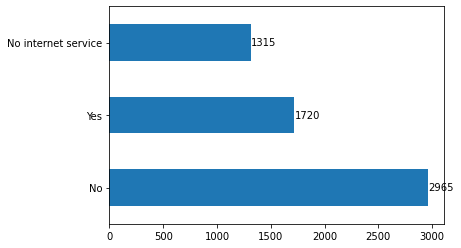

In [14]:
ax = data['OnlineSecurity'].value_counts().plot.barh()
ax.bar_label(ax.containers[0])

[Text(0, 0, '2623'), Text(0, 0, '2062'), Text(0, 0, '1315')]

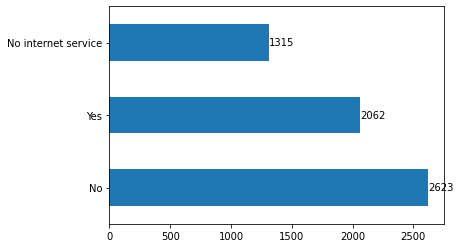

In [15]:
ax = data['OnlineBackup'].value_counts().plot.barh()
ax.bar_label(ax.containers[0])

[Text(0, 0, '2620'), Text(0, 0, '2065'), Text(0, 0, '1315')]

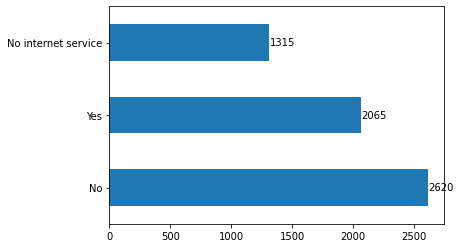

In [16]:
ax = data['DeviceProtection'].value_counts().plot.barh()
ax.bar_label(ax.containers[0])

[Text(0, 0, '2950'), Text(0, 0, '1735'), Text(0, 0, '1315')]

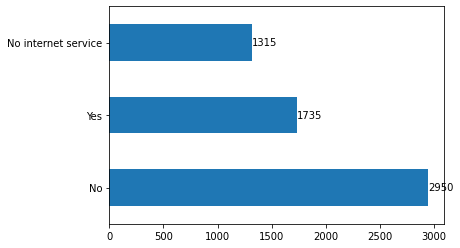

In [17]:
ax = data['TechSupport'].value_counts().plot.barh()
ax.bar_label(ax.containers[0])

[Text(0, 0, '2380'), Text(0, 0, '2305'), Text(0, 0, '1315')]

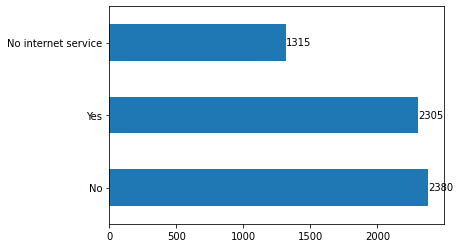

In [18]:
ax = data['StreamingTV'].value_counts().plot.barh()
ax.bar_label(ax.containers[0])

[Text(0, 0, '2356'), Text(0, 0, '2329'), Text(0, 0, '1315')]

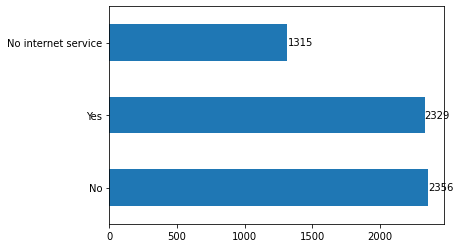

In [19]:
ax = data['StreamingMovies'].value_counts().plot.barh()
ax.bar_label(ax.containers[0])

[Text(0, 0, '3293'), Text(0, 0, '1459'), Text(0, 0, '1248')]

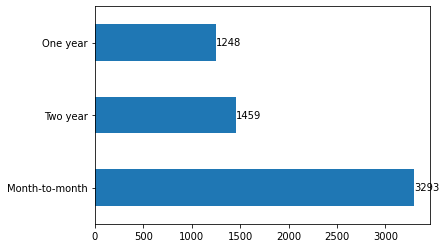

In [20]:
ax = data['Contract'].value_counts().plot.barh()
ax.bar_label(ax.containers[0])

<AxesSubplot:title={'center':'Contract'}, ylabel='Contract'>

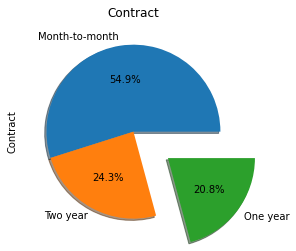

In [21]:
data['Contract'].value_counts().plot.pie(y='', title="Contract", legend=False, \
                   autopct='%1.1f%%', explode=(0, 0, 0.5), shadow=True, startangle=0)

<AxesSubplot:title={'center':'PaperlessBilling'}, ylabel='PaperlessBilling'>

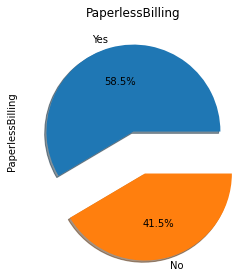

In [22]:
data['PaperlessBilling'].value_counts().plot.pie(y='', title="PaperlessBilling", legend=False, \
                   autopct='%1.1f%%', explode=(0, 0.5), shadow=True, startangle=0)

[Text(0, 0, '2030'),
 Text(0, 0, '1381'),
 Text(0, 0, '1299'),
 Text(0, 0, '1290')]

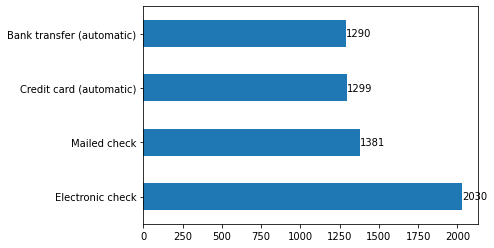

In [23]:
ax = data['PaymentMethod'].value_counts().plot.barh()
ax.bar_label(ax.containers[0])

[Text(0, 0, '4408'), Text(0, 0, '1592')]

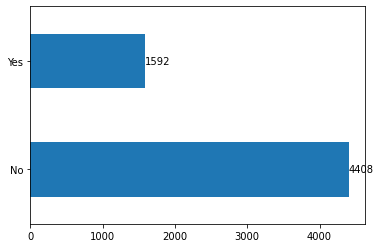

In [24]:
ax = data['Churn'].value_counts().plot.barh()
ax.bar_label(ax.containers[0])

## 2.2 Variables Cuantitativas - Continuas

|     Field             |     Description                                                  |
|-----------------------|------------------------------------------------------------------|
|     tenure            |     Number of months the customer has stayed with the company    |
|     MonthlyCharges    |     The amount charged to the customer monthly                   |
|     TotalCharges      |     The total amount charged to the customer                     |

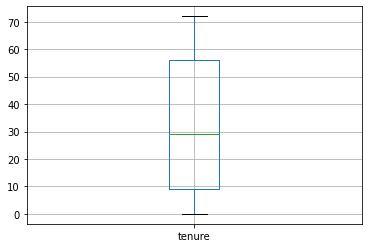

In [25]:
b_plot = data.boxplot(column = ['tenure'])

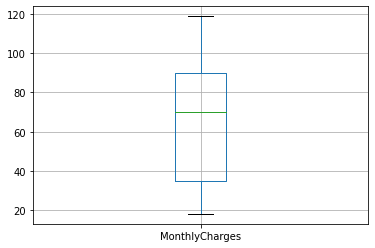

In [26]:
b_plot = data.boxplot(column = ['MonthlyCharges'])

In [27]:
missing = data[data['TotalCharges'].isna()]
missing

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [28]:
missing = data[data['TotalCharges'].isnull()]
missing

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [38]:
data2 = data.copy()
data["TotalCharges"] = pd.to_numeric(data["TotalCharges"])
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,5386-THSLQ,Female,1,Yes,No,66,No,No phone service,DSL,No,...,Yes,No,Yes,No,One year,No,Bank transfer (automatic),45.55,3027.25,No
4,3192-NQECA,Male,0,Yes,No,68,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),110.00,7611.85,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,4933-BSAIP,Female,0,Yes,No,40,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.10,780.10,No
5996,2030-BTZRO,Male,0,Yes,Yes,6,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),20.40,107.60,No
5997,1116-DXXDF,Male,0,No,No,39,Yes,No,Fiber optic,Yes,...,Yes,No,Yes,Yes,Two year,Yes,Electronic check,100.45,3801.70,No
5998,9274-CNFMO,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,No,Electronic check,74.95,308.70,Yes


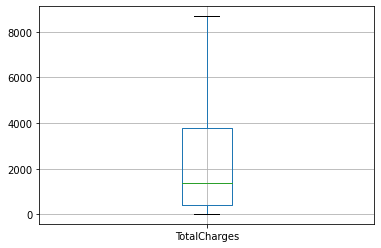

In [37]:
b_plot = data2.boxplot(column = ['TotalCharges'])

## 2.3 Analisis multivariado

Para el analisis multivariado estudiaremos la relacion de la variable de interes Chrun con todas las otras variables.

In [39]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.014994,0.217952,0.099310
tenure,0.014994,1.000000,0.255071,0.826872
MonthlyCharges,0.217952,0.255071,1.000000,0.654044
TotalCharges,0.099310,0.826872,0.654044,1.000000


### 2.3.1 Chrun vs Variables Categoricas

|     Field               |     Description                                                                                                                 |
|-------------------------|---------------------------------------------------------------------------------------------------------------------------------|
|     gender              |     Whether the customer is a male or a female                                                                                  |
|     SeniorCitizen       |     Whether the customer is a senior citizen or not (1, 0)                                                                      |
|     Partner             |     Whether the customer has a partner or not (Yes, No)                                                                         |
|     Dependents          |     Whether the customer has dependents or not (Yes, No)                                                                        |
|     PhoneService        |     Whether the customer has a phone service or not (Yes, No)                                                                   |
|     MultipleLines       |     Whether the customer has multiple lines or not (Yes, No, No   phone service)                                                |
|     InternetService     |     Customer’s internet service provider (DSL, Fiber optic, No)                                                                 |
|     OnlineSecurity      |     Whether the customer has online security or not (Yes, No,   No internet service)                                            |
|     OnlineBackup        |     Whether the customer has online backup or not (Yes, No, No   internet service)                                              |
|     DeviceProtection    |     Whether the customer has device protection or not (Yes, No,   No internet service)                                          |
|     TechSupport         |     Whether the customer has tech support or not (Yes, No, No   internet service)                                               |
|     StreamingTV         |     Whether the customer has streaming TV or not (Yes, No, No   internet service)                                               |
|     StreamingMovies     |     Whether the customer has streaming movies or not (Yes, No,   No internet service)                                           |
|     Contract            |     The contract term of the   customer (Month-to-month, One year, Two year)                                                    |
|     PaperlessBilling    |     Whether the customer has paperless billing or not (Yes, No)                                                                 |
|     PaymentMethod       |     The customer’s payment method (Electronic check, Mailed   check,     Bank transfer (automatic), Credit card (automatic))    |
|     Churn               |     Whether the customer churned or not (Yes or No)                                                                             |

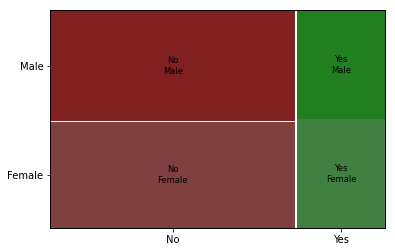

In [40]:
from statsmodels.graphics.mosaicplot import mosaic
mosaic(data=data, index=['Churn', 'gender'])
plt.show()

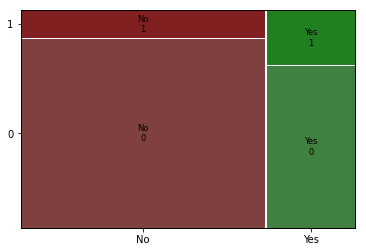

In [41]:
mosaic(data=data, index=['Churn', 'SeniorCitizen'])
plt.show()

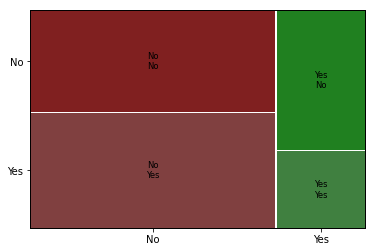

In [43]:
mosaic(data=data, index=['Churn', 'Partner'])
plt.show()

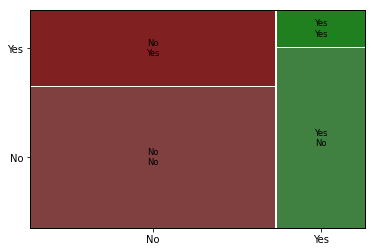

In [44]:
mosaic(data=data, index=['Churn', 'Dependents'])
plt.show()

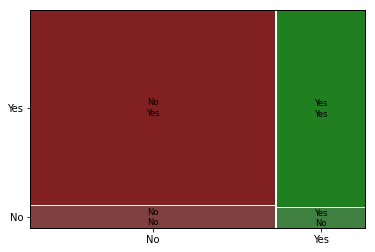

In [45]:
mosaic(data=data, index=['Churn', 'PhoneService'])
plt.show()

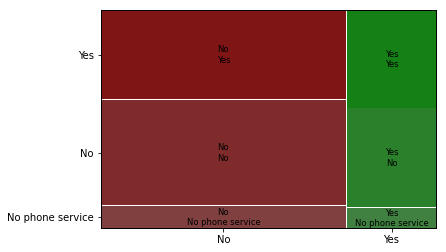

In [47]:
mosaic(data=data, index=['Churn', 'MultipleLines'])
plt.show()

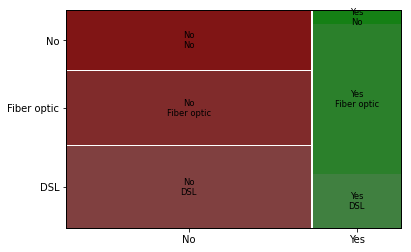

In [48]:
mosaic(data=data, index=['Churn', 'InternetService'])
plt.show()

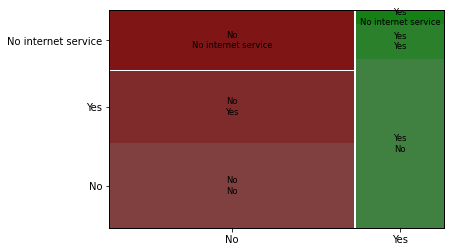

In [49]:
mosaic(data=data, index=['Churn', 'OnlineSecurity'])
plt.show()

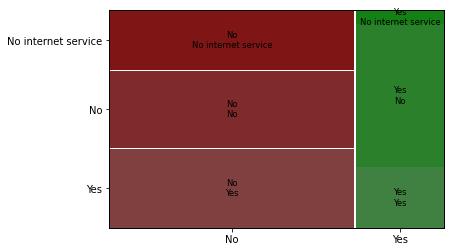

In [50]:
mosaic(data=data, index=['Churn', 'OnlineBackup'])
plt.show()

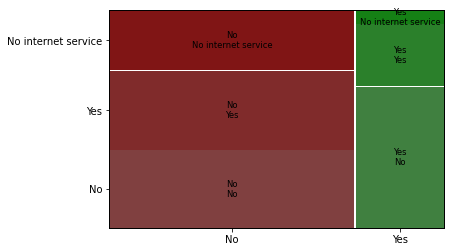

In [51]:
mosaic(data=data, index=['Churn', 'DeviceProtection'])
plt.show()

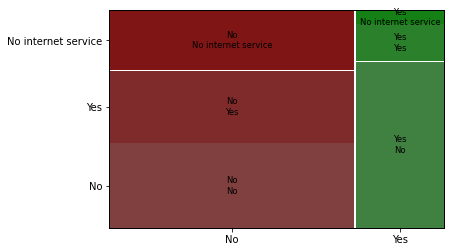

In [52]:
mosaic(data=data, index=['Churn', 'TechSupport'])
plt.show()

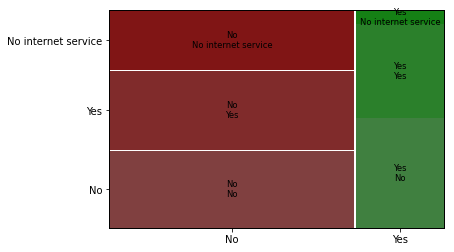

In [53]:
mosaic(data=data, index=['Churn', 'StreamingTV'])
plt.show()

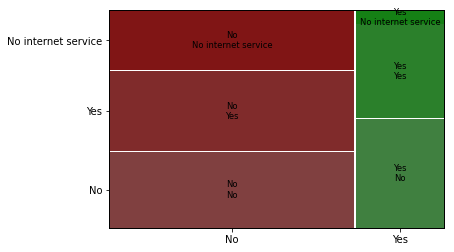

In [54]:
mosaic(data=data, index=['Churn', 'StreamingMovies'])
plt.show()

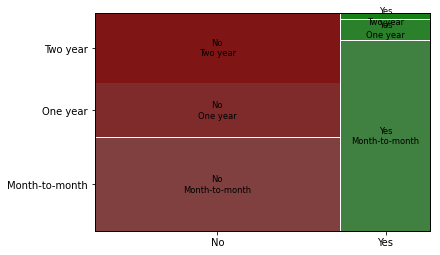

In [55]:
mosaic(data=data, index=['Churn', 'Contract'])
plt.show()

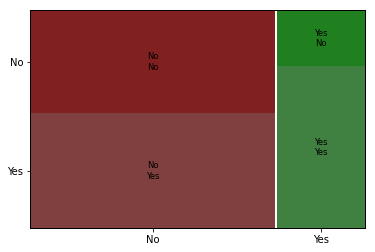

In [56]:
mosaic(data=data, index=['Churn', 'PaperlessBilling'])
plt.show()

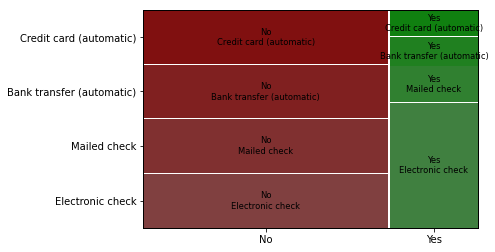

In [57]:
mosaic(data=data, index=['Churn', 'PaymentMethod'])
plt.show()

### 2.3.2 Churn vs Variables numericas

|     Field             |     Description                                                  |
|-----------------------|------------------------------------------------------------------|
|     tenure            |     Number of months the customer has stayed with the company    |
|     MonthlyCharges    |     The amount charged to the customer monthly                   |
|     TotalCharges      |     The total amount charged to the customer                     |

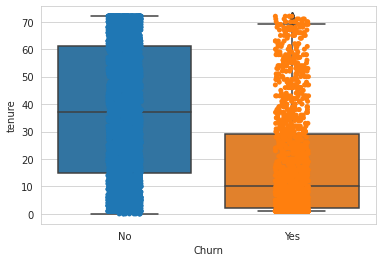

In [58]:
sns.set_style('whitegrid')
ax= sns.boxplot(x='Churn',y='tenure',data= data)
ax = sns.stripplot(x="Churn", y="tenure",data= data)

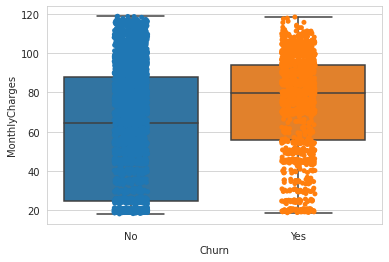

In [61]:
sns.set_style('whitegrid')
ax= sns.boxplot(x='Churn',y='MonthlyCharges',data= data)
ax = sns.stripplot(x="Churn", y="MonthlyCharges",data= data)

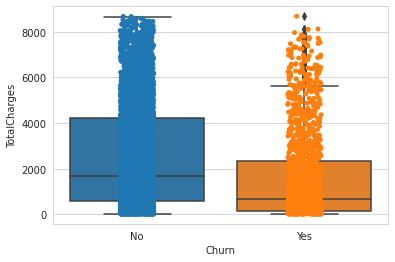

In [62]:
sns.set_style('whitegrid')
ax= sns.boxplot(x='Churn',y='TotalCharges',data= data)
ax = sns.stripplot(x="Churn", y="TotalCharges",data= data)

## 2.4 Conclusiones del analisis

1. Para poder construir el pipeline, es necesario considerar que los datos nuevos sean rechazados en caso de que no cumplan con la estructura de los datos originales.
2. Churn puede tener una correlacion con Monthly Charges.
3. Churn puede tener una correlacion inversa con tenure.

# 3. Construccion del pipeline y modelos

## 3.1 Preprocesamiento

In [64]:
train, test = train_test_split(data, test_size=0.2, random_state=33)
train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5674,5921-NGYRH,Male,0,Yes,No,64,Yes,No,Fiber optic,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,73.55,4764.00,No
2673,9766-HGEDE,Female,0,Yes,No,17,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.35,307.00,No
5117,0402-OAMEN,Female,0,Yes,Yes,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),24.45,1709.10,No
974,7182-OVLBJ,Female,0,Yes,Yes,62,Yes,Yes,Fiber optic,Yes,...,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),101.15,6638.35,No
148,0322-YINQP,Male,0,No,No,1,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,48.55,48.55,Yes


In [65]:
X_train, y_train = train.drop(['Churn'],axis=1), train['Churn'] 
display(X_train)
y_train

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
5674,5921-NGYRH,Male,0,Yes,No,64,Yes,No,Fiber optic,Yes,No,No,No,No,No,Month-to-month,Yes,Mailed check,73.55,4764.00
2673,9766-HGEDE,Female,0,Yes,No,17,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.35,307.00
5117,0402-OAMEN,Female,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),24.45,1709.10
974,7182-OVLBJ,Female,0,Yes,Yes,62,Yes,Yes,Fiber optic,Yes,No,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),101.15,6638.35
148,0322-YINQP,Male,0,No,No,1,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Mailed check,48.55,48.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3273,4521-YEEHE,Female,0,Yes,No,18,Yes,Yes,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Electronic check,88.85,1594.75
2706,6972-SNKKW,Female,0,No,No,6,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.00,109.20
578,3758-CKOQL,Female,0,Yes,No,59,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,No,Yes,One year,Yes,Credit card (automatic),107.00,6152.30
5848,3967-KXAPS,Male,0,Yes,No,72,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),92.30,6719.90


5674     No
2673     No
5117     No
974      No
148     Yes
       ... 
3273     No
2706     No
578      No
5848     No
2439    Yes
Name: Churn, Length: 4800, dtype: object

In [66]:
X_test, y_test = test.drop(['Churn'],axis=1), test['Churn'] 
display(X_test)
y_test

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
1781,1136-XGEQU,Female,0,Yes,Yes,50,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,Yes,One year,Yes,Credit card (automatic),84.15,4164.40
2505,0516-QREYC,Female,1,No,No,24,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.30,459.95
1369,5405-ZMYXQ,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),74.60,548.90
3528,7278-CKDNC,Male,1,No,No,24,Yes,Yes,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,80.50,2088.45
3319,8849-PRIQJ,Female,0,Yes,Yes,67,Yes,Yes,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,109.40,7281.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111,2692-BUCFV,Male,1,No,No,29,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),101.45,2948.60
613,3551-GAEGL,Male,0,Yes,Yes,34,No,No phone service,DSL,Yes,No,No,No,No,No,One year,No,Bank transfer (automatic),30.40,938.65
2082,9588-OZDMQ,Female,0,Yes,No,2,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,45.00,89.75
3823,2607-FBDFF,Male,0,No,No,1,Yes,No,DSL,No,No,No,Yes,No,No,Month-to-month,No,Credit card (automatic),49.00,49.00


1781     No
2505     No
1369     No
3528     No
3319     No
       ... 
1111     No
613      No
2082     No
3823     No
2740    Yes
Name: Churn, Length: 1200, dtype: object

In [83]:
numeric_features = ["TotalCharges", "MonthlyCharges", 'tenure']
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

categorical_features = ["gender", "SeniorCitizen", "Partner", "Dependents",
                        'PhoneService', "MultipleLines", 'InternetService',
                        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                        'TechSupport', 'StreamingTV', 'StreamingMovies',
                        'Contract', 'PaperlessBilling', 'PaymentMethod']
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

## 3.2 Regresión logistica 

In [84]:
pipe = Pipeline(steps=[("preprocessor", preprocessor), ("polinomial", PolynomialFeatures(include_bias=False)), ("classifier", LogisticRegression())])

parameters = {
              "preprocessor__num__imputer__strategy": ["mean", "median"],
              'preprocessor__num__scaler': [StandardScaler(), MinMaxScaler(), 'passthrought'],
              'polinomial__degree':[2,3,'passthrough']
              }

grid_search = GridSearchCV(pipe, parameters, verbose=2, scoring='roc_auc', cv=5, n_jobs=-1)

In [85]:
grid_search.fit(X_train,y_train)
best_lr = grid_search.best_estimator_
grid_search.best_params_

Fitting 5 folds for each of 18 candidates, totalling 90 fits


/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
50 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/pipeline.py", li

{'polinomial__degree': 2,
 'preprocessor__num__imputer__strategy': 'mean',
 'preprocessor__num__scaler': MinMaxScaler()}

In [86]:
y_pred_train = best_lr.predict(X_train)
y_pred_test = best_lr.predict(X_test)

print("Train:")
print(classification_report(y_train,y_pred_train))
print("Test:")
print(classification_report(y_test,y_pred_test))

Train:
              precision    recall  f1-score   support

          No       0.85      0.90      0.88      3519
         Yes       0.69      0.57      0.62      1281

    accuracy                           0.82      4800
   macro avg       0.77      0.74      0.75      4800
weighted avg       0.81      0.82      0.81      4800

Test:
              precision    recall  f1-score   support

          No       0.84      0.87      0.86       889
         Yes       0.59      0.54      0.57       311

    accuracy                           0.78      1200
   macro avg       0.72      0.71      0.71      1200
weighted avg       0.78      0.78      0.78      1200



In [88]:
filename = 'regresion_logistica.sav'
joblib.dump(best_lr, filename)

['regresion_logistica.sav']

## 3.3 DecisionTreeClassifier

In [91]:
pipe = Pipeline(steps=[("preprocessor", preprocessor), ("rfc", DecisionTreeClassifier())])

parameters = {
              "preprocessor__num__imputer__strategy": ["mean", "median"],
              'preprocessor__num__scaler': [StandardScaler(), MinMaxScaler(), 'passthrought'],
              'rfc__splitter': ['best','random'],
              'rfc__max_depth': [None,10,20,30],
              }

grid_search = GridSearchCV(pipe, parameters, verbose=2, scoring='roc_auc', cv=5, n_jobs=-1)

In [92]:
grid_search.fit(X_train,y_train)
best_lr = grid_search.best_estimator_
grid_search.best_params_

Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
80 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/pipeline.py", line 348, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/usr/local/lib/python3.8/dist-package

{'preprocessor__num__imputer__strategy': 'median',
 'preprocessor__num__scaler': StandardScaler(),
 'rfc__max_depth': 10,
 'rfc__splitter': 'random'}

In [93]:
y_pred_train = best_lr.predict(X_train)
y_pred_test = best_lr.predict(X_test)

print("Train:")
print(classification_report(y_train,y_pred_train))
print("Test:")
print(classification_report(y_test,y_pred_test))

Train:
              precision    recall  f1-score   support

          No       0.89      0.93      0.91      3519
         Yes       0.78      0.70      0.74      1281

    accuracy                           0.87      4800
   macro avg       0.84      0.81      0.82      4800
weighted avg       0.86      0.87      0.87      4800

Test:
              precision    recall  f1-score   support

          No       0.83      0.84      0.84       889
         Yes       0.53      0.50      0.52       311

    accuracy                           0.76      1200
   macro avg       0.68      0.67      0.68      1200
weighted avg       0.75      0.76      0.75      1200



In [94]:
filename = 'decision_tree.sav'
joblib.dump(best_lr, filename)

['decision_tree.sav']

## 3.4 KNeighborsClassifier

In [95]:
pipe = Pipeline(steps=[("preprocessor", preprocessor), ('pca', PCA()), ("knn", KNeighborsClassifier())])

parameters = {
              "preprocessor__num__imputer__strategy": ["mean", "median"],
              'preprocessor__num__scaler': [StandardScaler(), MinMaxScaler(), 'passthrought'],
              'pca': [PCA(), 'passthrough'],
              'knn__n_neighbors':[1,2,3,4,5],
              "knn__algorithm": ["auto",  "ball_tree", "kd_tree", "brute"]
              }

grid_search = GridSearchCV(pipe, parameters, verbose=2, scoring='roc_auc', cv=5, n_jobs=-1)

In [96]:
grid_search.fit(X_train,y_train)
best_lr = grid_search.best_estimator_
grid_search.best_params_

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
400 fits failed out of a total of 1200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/pipeline.py", line 348, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/usr/local/lib/python3.8/dist-pack

{'knn__algorithm': 'auto',
 'knn__n_neighbors': 5,
 'pca': PCA(),
 'preprocessor__num__imputer__strategy': 'mean',
 'preprocessor__num__scaler': StandardScaler()}

In [97]:
y_pred_train = best_lr.predict(X_train)
y_pred_test = best_lr.predict(X_test)

print("Train:")
print(classification_report(y_train,y_pred_train))
print("Test:")
print(classification_report(y_test,y_pred_test))

Train:
              precision    recall  f1-score   support

          No       0.88      0.90      0.89      3519
         Yes       0.71      0.65      0.68      1281

    accuracy                           0.84      4800
   macro avg       0.79      0.78      0.78      4800
weighted avg       0.83      0.84      0.83      4800

Test:
              precision    recall  f1-score   support

          No       0.84      0.84      0.84       889
         Yes       0.55      0.56      0.55       311

    accuracy                           0.77      1200
   macro avg       0.70      0.70      0.70      1200
weighted avg       0.77      0.77      0.77      1200



In [98]:
filename = 'knn.sav'
joblib.dump(best_lr, filename)

['knn.sav']

## 4.5 SVMClassifier

In [99]:
pipe = Pipeline(steps=[("preprocessor", preprocessor), ("svc", SVC())])

parameters = {
              "preprocessor__num__imputer__strategy": ["mean", "median"],
              'preprocessor__num__scaler': [StandardScaler(), MinMaxScaler(), 'passthrought'],
              'svc__C':[0.5, 1, 2], #Termino de regularizacion, es inversamente proporcional a C
              "svc__kernel": ["linear","poly", "rbf", "sigmoid"]
              }

grid_search = GridSearchCV(pipe, parameters, verbose=2, scoring='roc_auc', cv=5, n_jobs=-1)

In [100]:
grid_search.fit(X_train,y_train)
best_lr = grid_search.best_estimator_
grid_search.best_params_

Fitting 5 folds for each of 72 candidates, totalling 360 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
120 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/pipeline.py", line 348, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/usr/local/lib/python3.8/dist-packag

{'preprocessor__num__imputer__strategy': 'median',
 'preprocessor__num__scaler': MinMaxScaler(),
 'svc__C': 0.5,
 'svc__kernel': 'linear'}

In [101]:
y_pred_train = best_lr.predict(X_train)
y_pred_test = best_lr.predict(X_test)

print("Train:")
print(classification_report(y_train,y_pred_train))
print("Test:")
print(classification_report(y_test,y_pred_test))

Train:
              precision    recall  f1-score   support

          No       0.84      0.89      0.87      3519
         Yes       0.65      0.54      0.59      1281

    accuracy                           0.80      4800
   macro avg       0.75      0.72      0.73      4800
weighted avg       0.79      0.80      0.79      4800

Test:
              precision    recall  f1-score   support

          No       0.84      0.89      0.87       889
         Yes       0.64      0.53      0.58       311

    accuracy                           0.80      1200
   macro avg       0.74      0.71      0.72      1200
weighted avg       0.79      0.80      0.79      1200



In [102]:
filename = 'svm.sav'
joblib.dump(best_lr, filename)

['svm.sav']

## 3.6 RandomForestClassifier

In [103]:
pipe = Pipeline(steps=[("preprocessor", preprocessor), ("rfc", RandomForestClassifier())])

parameters = {
              "preprocessor__num__imputer__strategy": ["mean", "median"],
              'preprocessor__num__scaler': [StandardScaler(), MinMaxScaler(), 'passthrought'],
              'rfc__n_estimators': [50, 100, 200],
              'rfc__max_depth': [10, 15, 20],
              'rfc__min_samples_leaf': [2, 4, 6]
              }

grid_search = GridSearchCV(pipe, parameters, verbose=2, scoring='roc_auc', cv=5, n_jobs=-1)

In [104]:
grid_search.fit(X_train,y_train)
best_lr = grid_search.best_estimator_
grid_search.best_params_

Fitting 5 folds for each of 162 candidates, totalling 810 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
270 fits failed out of a total of 810.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
135 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/pipeline.py", line 348, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/usr/local/lib/python3.8/dist-packa

{'preprocessor__num__imputer__strategy': 'mean',
 'preprocessor__num__scaler': MinMaxScaler(),
 'rfc__max_depth': 10,
 'rfc__min_samples_leaf': 6,
 'rfc__n_estimators': 100}

In [105]:
y_pred_train = best_lr.predict(X_train)
y_pred_test = best_lr.predict(X_test)

print("Train:")
print(classification_report(y_train,y_pred_train))
print("Test:")
print(classification_report(y_test,y_pred_test))

Train:
              precision    recall  f1-score   support

          No       0.86      0.93      0.89      3519
         Yes       0.75      0.58      0.66      1281

    accuracy                           0.84      4800
   macro avg       0.80      0.76      0.78      4800
weighted avg       0.83      0.84      0.83      4800

Test:
              precision    recall  f1-score   support

          No       0.84      0.91      0.87       889
         Yes       0.65      0.50      0.56       311

    accuracy                           0.80      1200
   macro avg       0.74      0.70      0.72      1200
weighted avg       0.79      0.80      0.79      1200



In [106]:
filename = 'random_forest.sav'
joblib.dump(best_lr, filename)

['random_forest.sav']

## 3.7 XGboost Classifier

In [107]:
pipe = Pipeline(steps=[("preprocessor", preprocessor), ("xgb", GradientBoostingClassifier())])

parameters = {
              "preprocessor__num__imputer__strategy": ["mean", "median"],
              'preprocessor__num__scaler': [StandardScaler(), MinMaxScaler(), 'passthrought'],
              'xgb__n_estimators': [50, 100, 200],
              'xgb__max_depth': [10, 15, 20]
              }

grid_search = GridSearchCV(pipe, parameters, verbose=2, scoring='roc_auc', cv=5, n_jobs=-1)

In [108]:
grid_search.fit(X_train,y_train)
best_lr = grid_search.best_estimator_
grid_search.best_params_

Fitting 5 folds for each of 54 candidates, totalling 270 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
90 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/pipeline.py", line 348, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/usr/local/lib/python3.8/dist-package

{'preprocessor__num__imputer__strategy': 'mean',
 'preprocessor__num__scaler': MinMaxScaler(),
 'xgb__max_depth': 10,
 'xgb__n_estimators': 50}

In [109]:
y_pred_train = best_lr.predict(X_train)
y_pred_test = best_lr.predict(X_test)

print("Train:")
print(classification_report(y_train,y_pred_train))
print("Test:")
print(classification_report(y_test,y_pred_test))

Train:
              precision    recall  f1-score   support

          No       1.00      1.00      1.00      3519
         Yes       0.99      0.99      0.99      1281

    accuracy                           0.99      4800
   macro avg       0.99      0.99      0.99      4800
weighted avg       0.99      0.99      0.99      4800

Test:
              precision    recall  f1-score   support

          No       0.83      0.88      0.85       889
         Yes       0.58      0.49      0.53       311

    accuracy                           0.78      1200
   macro avg       0.71      0.68      0.69      1200
weighted avg       0.77      0.78      0.77      1200



In [110]:
filename = 'xgboost.sav'
joblib.dump(best_lr, filename)

['xgboost.sav']

# 4. Conclusiones

- Los mejores modelos fueron el SVM y el RandomForest ya que tuvieron los mismos puntajes de F1 score y acuraccy, y muy pequeña diferencia entre el train y el test.
- ¿Se evidencian problemas de overfitting o underfitting? la mayoria de los modelos tienen un resultado de train y test muy cercano en todas las metricas, lo que significa que el modelo puede ser generalizable dado el numero de datos y variables que se le dieron al modelo. Sin embargo modelos como el XGboost, si tienen diferencias considerables entre ambos datasets, lo que demuestra un overfitting.

En general todos los modelos tuvieron dificultad con la clase 'Yes', pero esto puede ser por un desbalance de clases, por lo que predecir 'No' era mas facil.

- ¿por qué es preferible la métrica ROC AUC?

El área bajo la curva (AUC) de las características operativas del receptor (ROC) es una métrica común para evaluar el rendimiento de los modelos de **clasificación binaria**. A menudo se considera una métrica mejor que la puntuación F1 por varias razones:

La métrica ROC AUC es invariable en función de la escala. Esto significa que no se ve afectada por los cambios en el umbral de probabilidad utilizado para convertir las probabilidades predichas en etiquetas de clase. Por el contrario, la puntuación F1 puede ser sensible a los cambios en el umbral de probabilidad y no siempre es la métrica óptima para evaluar el rendimiento de un modelo de clasificación.

La métrica ROC AUC no es sensible a las clases desequilibradas. En problemas de clasificación binaria con clases desequilibradas, la puntuación F1 puede estar sesgada hacia la clase mayoritaria y no reflejar con precisión el rendimiento del modelo en la clase minoritaria. La métrica ROC AUC, por otro lado, está diseñada para ser insensible al desequilibrio de clases, y puede proporcionar una evaluación más precisa del rendimiento del modelo en estas situaciones.

La métrica ROC AUC proporciona una métrica única e intuitiva que puede utilizarse para comparar diferentes modelos de clasificación. En cambio, la puntuación F1 se basa en la precisión y el recall del modelo, que son dos métricas distintas que deben calcularse y combinarse de alguna forma para obtener la puntuación F1. Esto puede hacer que sea más difícil comparar modelos basándose en sus puntuaciones F1, especialmente si los modelos tienen diferentes valores de precisión y recuperación.

En general, la métrica ROC AUC es una métrica ampliamente utilizada y bien establecida para evaluar el rendimiento de los modelos de **clasificación binaria**, y a menudo se considera una métrica superior a la puntuación F1 para este tipo de problemas.